In [125]:
# Load necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [100]:
#Read the dataset
Bankruptcy_df = pd.read_csv('Qualitative_Bankruptcy.data.txt',names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness',
                     'Operating Risk','Class'])

In [101]:
# Explore the dataset
Bankruptcy_df.head(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [102]:
print(Bankruptcy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB
None


In [104]:
# Gathering Indepdendent features separately to apply encoding
Bankruptcy_ind_features= Bankruptcy_df.iloc[:,:-1]
Bankruptcy_dependent = Bankruptcy_df.iloc[:,6]

In [105]:
Bankruptcy_ind_features.columns

Index(['Industrial Risk', 'Management Risk', 'Financial Flexibility',
       'Credibility', 'Competitiveness', 'Operating Risk'],
      dtype='object')

In [107]:
# Import Label encoder and convert the categorical variable using Label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Bankruptcy_ind_features['Industrial Risk']=le.fit_transform(Bankruptcy_ind_features['Industrial Risk'])
Bankruptcy_ind_features['Management Risk']=le.fit_transform(Bankruptcy_ind_features['Management Risk'])
Bankruptcy_ind_features['Financial Flexibility']=le.fit_transform(Bankruptcy_ind_features['Financial Flexibility'])
Bankruptcy_ind_features['Credibility']=le.fit_transform(Bankruptcy_ind_features['Credibility'])
Bankruptcy_ind_features['Competitiveness']=le.fit_transform(Bankruptcy_ind_features['Competitiveness'])
Bankruptcy_ind_features['Operating Risk']=le.fit_transform(Bankruptcy_ind_features['Operating Risk'])

C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [108]:
Bankruptcy_ind_features

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1
...,...,...,...,...,...,...
245,1,1,0,1,1,1
246,2,1,1,1,1,1
247,0,1,1,1,1,1
248,1,1,1,1,1,1


In [109]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
Bankruptcy_encoded = onehotencoder.fit_transform(Bankruptcy_ind_features).toarray()

In [111]:
Bankruptcy_encoded = pd.DataFrame(Bankruptcy_encoded)

In [113]:
#Segregating dependent and independent features into two seprate data frames
Bankruptcy_independent= Bankruptcy_encoded
Bankruptcy_dependent = Bankruptcy_df.iloc[:,6]

In [192]:
#Split the data into train and test split
seed =10
X=Bankruptcy_independent
y=Bankruptcy_dependent
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=seed)

In [195]:
X_test.shape

(50, 18)

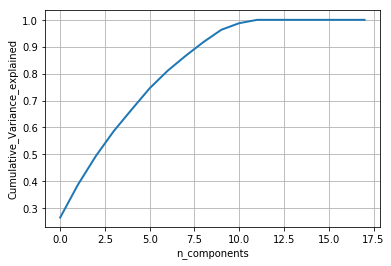

In [117]:
# Analyzing number of PCA components with the Variance explained
pca = PCA()
pca.n_components=18
pca_data = pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_
cum_var_explained= np.cumsum(percentage_var_explained)
#Plot PCA spectrum
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [118]:
# PCA Components with Variance
pca=PCA()  
pca.n_components=18
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=26.540000
if n_components= 1,   variance=38.840000
if n_components= 2,   variance=49.470000
if n_components= 3,   variance=58.720000
if n_components= 4,   variance=66.740000
if n_components= 5,   variance=74.590000
if n_components= 6,   variance=81.080000
if n_components= 7,   variance=86.590000
if n_components= 8,   variance=91.740000
if n_components= 9,   variance=96.310000
if n_components= 10,   variance=98.760000
if n_components= 11,   variance=100.000000
if n_components= 12,   variance=100.000000
if n_components= 13,   variance=100.000000
if n_components= 14,   variance=100.000000
if n_components= 15,   variance=100.000000
if n_components= 16,   variance=100.000000
if n_components= 17,   variance=100.000000


In [173]:
#Let's say you would like to explain 95% variance  
pca=PCA(.95)  
pca.fit(X_train)  
print('Number of components to explain 95% Variance is',pca.n_components_)

Number of components to explain 95% Variance is 10


In [162]:
# Fit the PCA with ideal number of components to training data
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [163]:
# Train the PCA with ideal number of components to training data
X_train_PCA = pca.transform(X_train)

In [164]:
X_train_PCA

array([[ 1.57790146, -0.59872941,  0.13170554, ..., -0.01167024,
         0.13819077, -0.05956845],
       [-1.02750356,  0.1119649 ,  1.07205311, ..., -0.61444596,
         0.40465145,  0.16651351],
       [ 1.57790146, -0.59872941,  0.13170554, ..., -0.01167024,
         0.13819077, -0.05956845],
       ...,
       [ 1.04591506,  1.16522274,  0.53787456, ..., -0.02436072,
         0.28201515, -0.33261783],
       [-0.26026956, -1.23661171, -0.01511392, ...,  1.13648644,
         0.39205347, -0.48900463],
       [-1.39674069, -0.04218112, -0.03603367, ..., -0.79871122,
        -0.35869354,  0.4160481 ]])

In [165]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_train_PCA)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,748.624292
1,2,562.586458
2,3,503.144382
3,4,465.020358
4,5,426.106573
5,6,396.646569
6,7,372.408383
7,8,352.091711
8,9,333.386707
9,10,325.211274


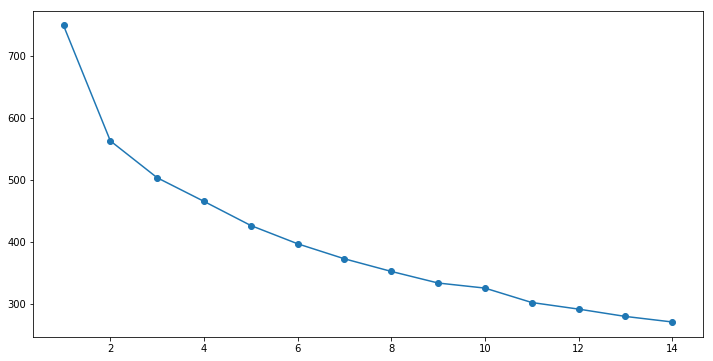

In [166]:
# Elbow plot to decide ideal number of clusters
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="o")

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 8 The average silhouette_score is : 0.33148538996489124
For n_clusters = 10 The average silhouette_score is : 0.3392920964838248
For n_clusters = 12 The average silhouette_score is : 0.3548847919125572
For n_clusters = 14 The average silhouette_score is : 0.3591478987980633
For n_clusters = 16 The average silhouette_score is : 0.3412145549329891


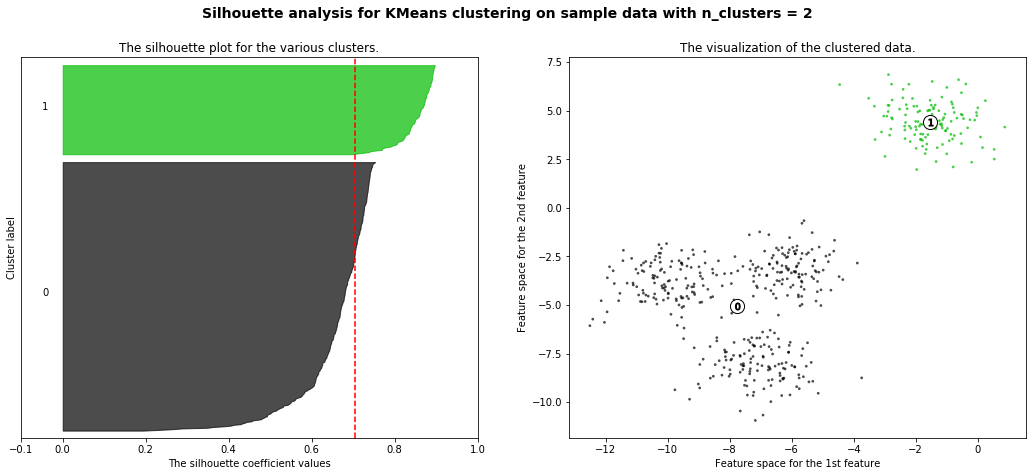

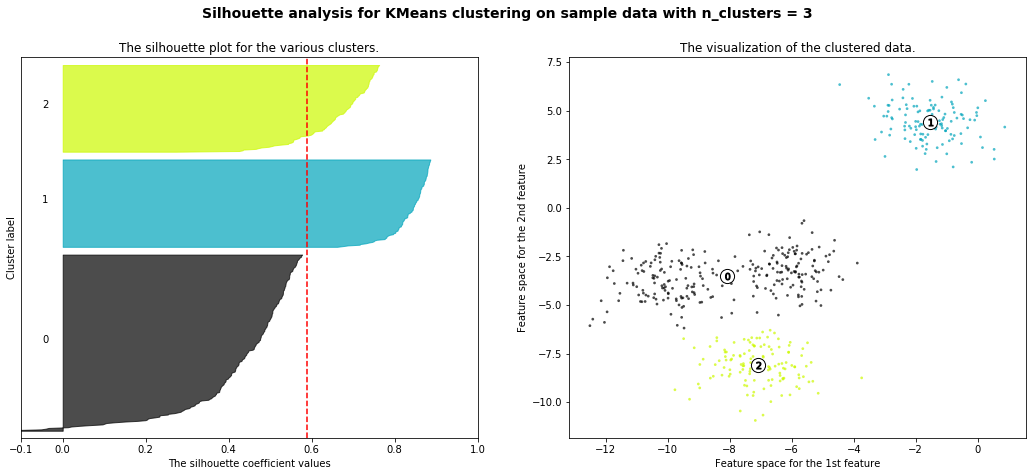

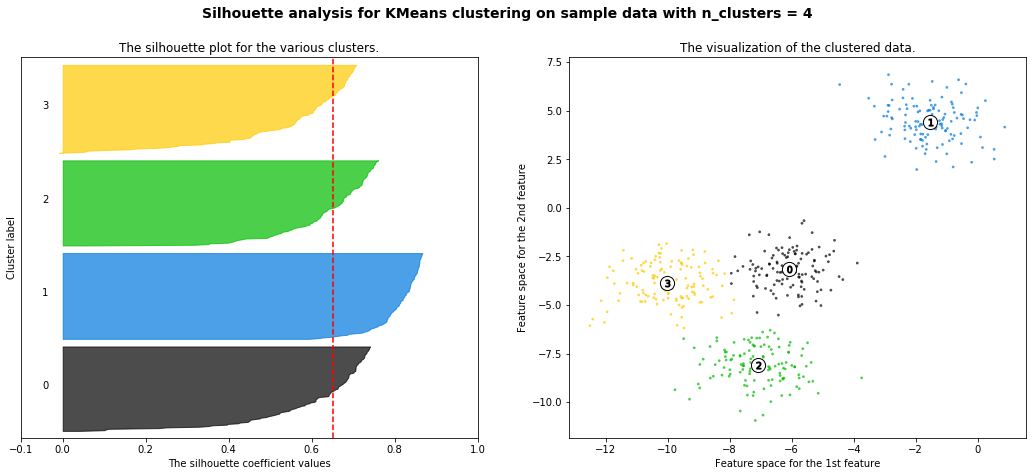

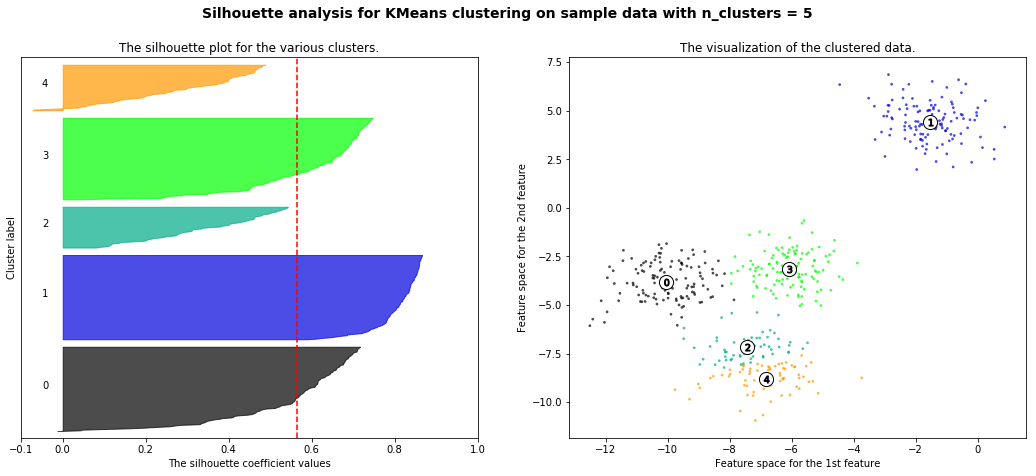

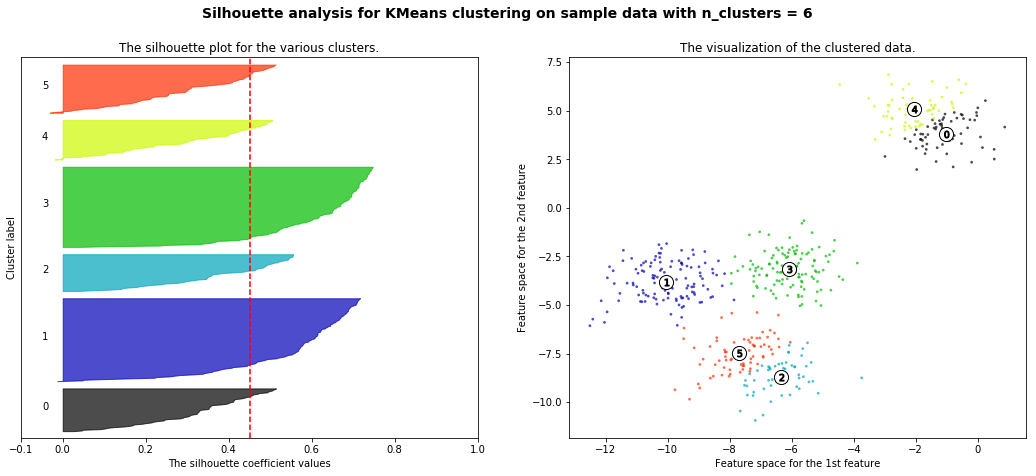

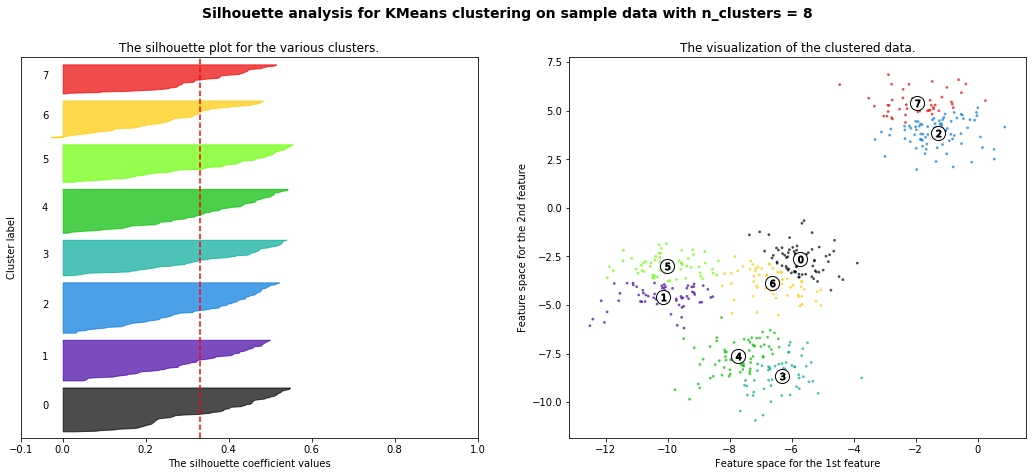

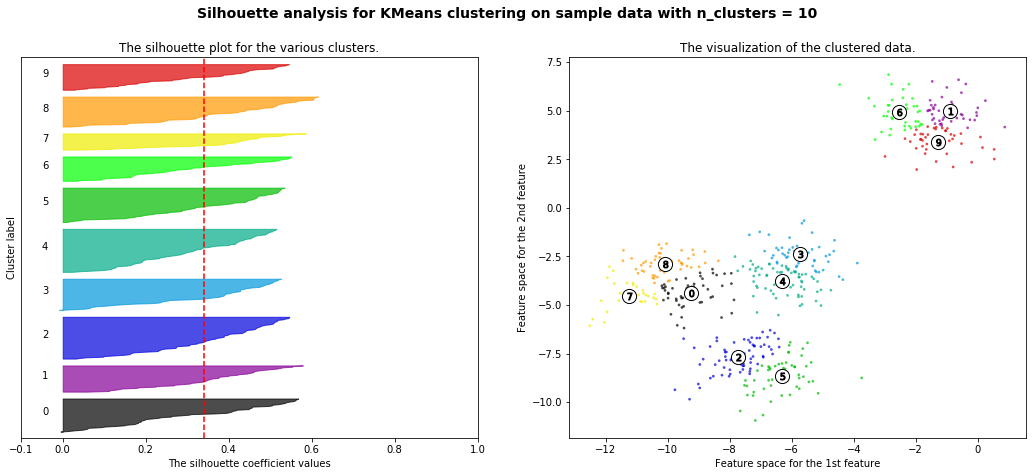

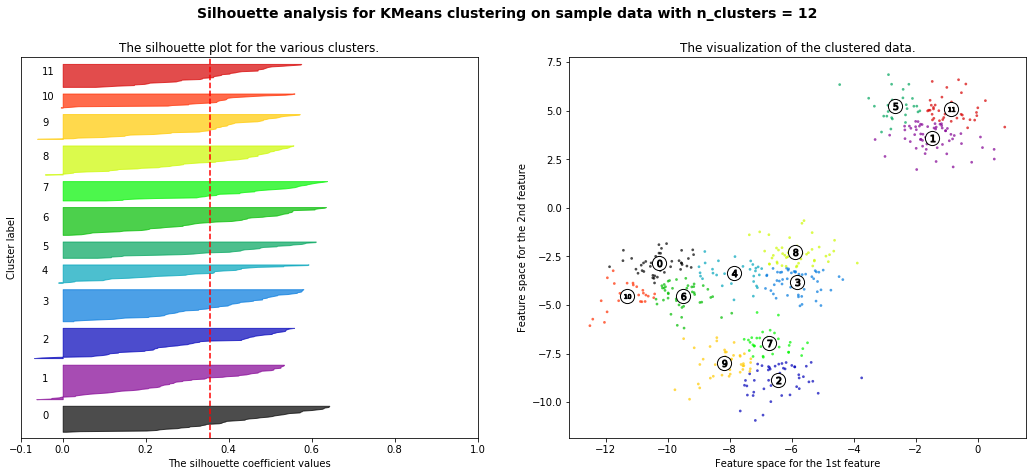

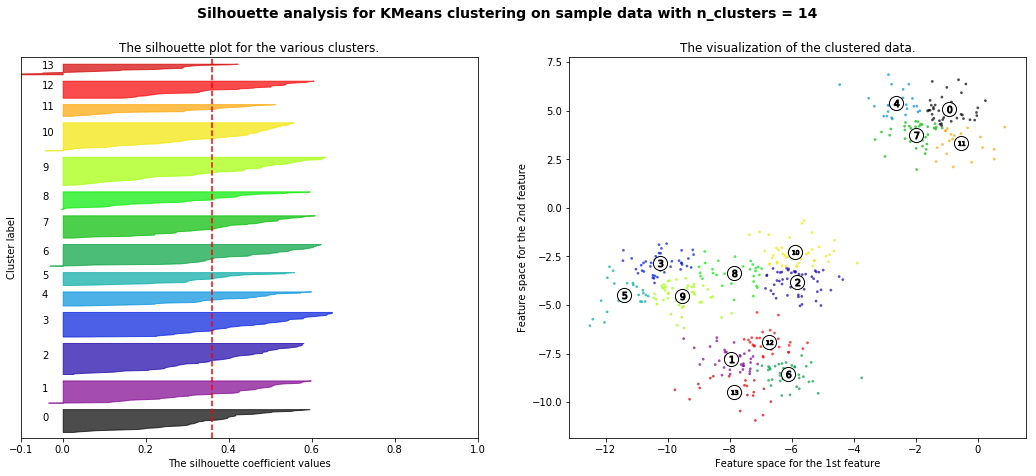

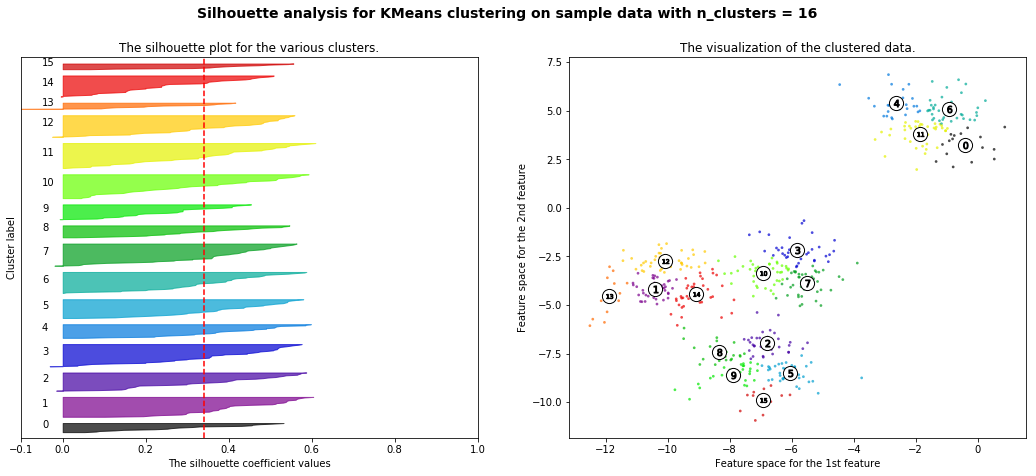

In [167]:
# Analyzing and deciding upon ideal number of clusters using silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,8,10,12,14,16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [168]:
#  Fit and trasnform the training data using KmeansClustering after deciding upon ideal no. of clusters
kmeans =KMeans(n_clusters=2,n_init=15,random_state=2)

In [169]:
kmeans.fit(X_train_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [170]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids)
centroid_df

,0,1,2,3,4,5,6,7,8,9
0,1.098147,0.107102,-0.048751,-0.098659,-0.033628,-0.003526,-0.039454,-0.005360,-0.021628,0.018345
1,-0.828427,-0.080797,0.036777,0.074427,0.025368,0.002660,0.029763,0.004044,0.016316,-0.013839


In [171]:
X_kmeans=kmeans.transform(X_train_PCA)

In [178]:
# Labeling the clusters in the training data
Xtrain_kmeans = pd.DataFrame(X_kmeans,columns=['Cluster1','Cluster2'])
Xtrain_kmeans

,Cluster1,Cluster2
0,0.918691,2.476473
1,2.748620,1.680729
2,0.918691,2.476473
3,2.754541,1.717263
4,2.938867,1.717889
...,...,...
195,2.228522,1.906075
196,2.475434,1.920092
197,1.499058,2.455098
198,2.485239,1.956260


In [196]:
#Apply pca on test dataset
pca = PCA(n_components=10)
pca.fit(X_test)
X_test_PCA = pca.transform(X_test)

In [200]:
#kmeans clustering on testing dataset and Labeling the clusters in the testing data
kmeans.fit(X_test_PCA)
Xtest_kmeans=kmeans.transform(X_test_PCA)
Xtest_kmeans = pd.DataFrame(Xtest_kmeans,columns=['Cluster1','Cluster2'])
Xtest_kmeans

,Cluster1,Cluster2
0,2.971981,1.413752
1,2.914577,1.601865
2,2.914577,1.601865
3,1.225751,2.507500
4,2.680050,1.813823
5,2.892515,1.849938
6,1.347341,2.566759
7,2.850925,1.503335
8,1.027550,2.586148
9,2.919700,1.764601


In [201]:
# Apply Support Vector model with the KMeans Clustered data using Linear Kernel method and predicting the accuracy.
from sklearn.svm import SVC
svc_model= SVC(C=.1,kernel='linear',gamma=1)
svc_model.fit(Xtrain_kmeans,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [202]:
prediction = svc_model.predict(Xtest_kmeans)

In [205]:
print(svc_model.score(Xtrain_kmeans,y_train))
print(svc_model.score(Xtest_kmeans,y_test))

0.99
1.0


In [206]:
# Apply Support Vector model with the KMeans Clustered data using rbf Kernel method and predicting the accuracy.
from sklearn.svm import SVC
svc_model= SVC(C=.1,kernel='rbf',gamma=1)
svc_model.fit(Xtrain_kmeans,y_train)
prediction = svc_model.predict(Xtest_kmeans)
print(svc_model.score(Xtrain_kmeans,y_train))
print(svc_model.score(Xtest_kmeans,y_test))

0.99
1.0


In [207]:
# Apply Support Vector model with the KMeans Clustered data using polynomial Kernel method and predicting the accuracy.
from sklearn.svm import SVC
svc_model= SVC(C=.1,kernel='poly',gamma=1)
svc_model.fit(Xtrain_kmeans,y_train)
prediction = svc_model.predict(Xtest_kmeans)
print(svc_model.score(Xtrain_kmeans,y_train))
print(svc_model.score(Xtest_kmeans,y_test))

0.99
0.92
